<a href="https://colab.research.google.com/github/snehasri25/Data-Visualization/blob/master/Minard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
require(ggplot2)
require(scales)
require(gridExtra)
library(HistData)
library(ggmap)
library(ggrepel)

Using Google's ggmap - Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

In [26]:
data(Minard.troops)
data(Minard.cities)
data(Minard.temp)
head(Minard.cities)
head(Minard.temp)
head(Minard.troops)

,long,lat,city
,<dbl>,<dbl>,<fct>
1,24.0,55.0,Kowno
2,25.3,54.7,Wilna
3,26.4,54.4,Smorgoni
4,26.8,54.3,Moiodexno
5,27.7,55.2,Gloubokoe
6,27.6,53.9,Minsk


,long,temp,days,date
,<dbl>,<int>,<int>,<fct>
1,37.6,0,6,Oct18
2,36.0,0,6,Oct24
3,33.2,-9,16,Nov09
4,32.0,-21,5,Nov14
5,29.2,-11,10,NA
6,28.5,-20,4,Nov28


,long,lat,survivors,direction,group
,<dbl>,<dbl>,<int>,<fct>,<int>
1,24.0,54.9,340000,A,1
2,24.5,55.0,340000,A,1
3,25.5,54.5,340000,A,1
4,26.0,54.7,320000,A,1
5,27.0,54.8,300000,A,1
6,28.0,54.9,280000,A,1


In [0]:
troops <- ggplot(Minard.troops, aes(long, lat)) +
  geom_path(aes(size = survivors, colour = direction, group = group),
            linejoin = "round",lineend = "round") 
#plot_cities <- geom_text 

In [0]:
breaks <- c(1, 2, 3) * 10^5 
plot_minard <- troops + 
  scale_size("Survivors", range = c(1, 10), 
             breaks = breaks, labels = scales::comma(breaks)) +
  scale_color_manual("Direction", 
                     values = c("black", "orange"), 
                     labels=c("Advance", "Retreat")) +
  coord_cartesian(xlim = c(24, 38)) +
  xlab("Longitude") + 
  ylab("Latitude") + 
  ggtitle("Napoleon's March on Moscow") +
  theme_bw() +
  theme(legend.position=c(.8, .2), legend.box="horizontal")


In [0]:
#' ## plot temperature vs. longitude, with labels for dates
temp <- ggplot(Minard.temp, aes(long, temp)) +
  geom_path(color="#008080", size=2.5) +
  geom_point(size=2) +
  geom_text(aes(label=date)) +
  xlab("Longitude") + ylab("Temperature") +
  coord_cartesian(xlim = c(24, 38)) + 
  theme_bw()

Warning message:
“Removed 1 rows containing missing values (geom_text).”


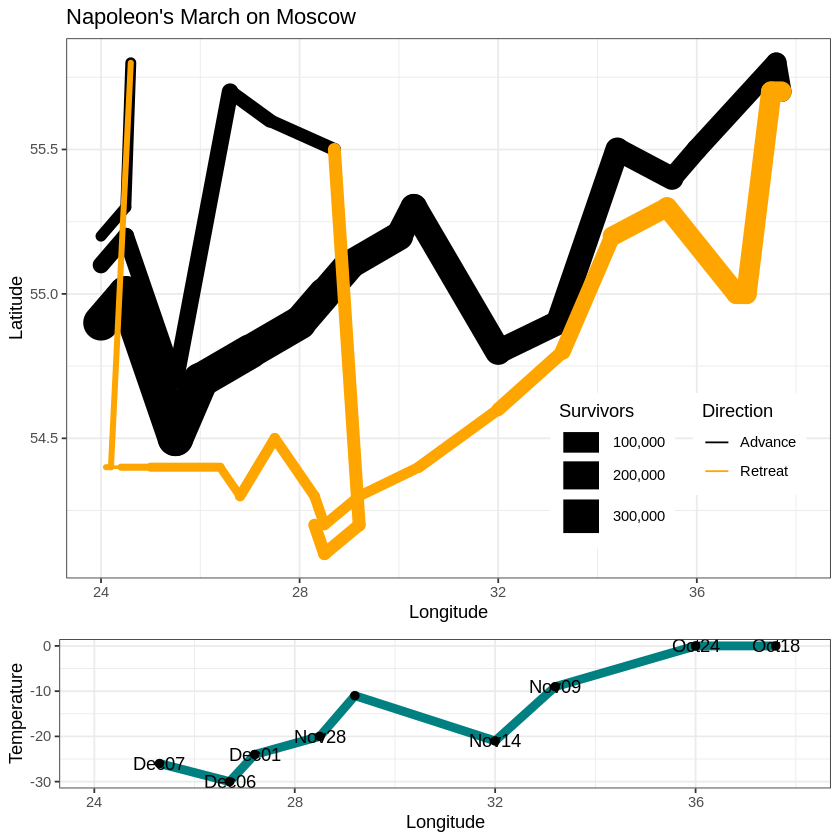

In [44]:
#' The plot works best if we  re-scale the plot window to an aspect ratio of ~ 2 x 1
# windows(width=10, height=5)

#' Combine the two plots into one
grid.arrange(plot_minard, temp, nrow=2, heights=c(3,1))

In [0]:
march.1812.ne.europe <- c(left = 23.5, bottom = 53.4, right = 38.1, top = 56.3)

In [48]:
march.1812.ne.europe.map <- get_stamenmap(bbox = march.1812.ne.europe,zoom = 6 ,
                                          maptype = "watercolor", where = "cache")

Source : http://tile.stamen.com/watercolor/6/36/19.jpg

Source : http://tile.stamen.com/watercolor/6/37/19.jpg

Source : http://tile.stamen.com/watercolor/6/38/19.jpg

Source : http://tile.stamen.com/watercolor/6/36/20.jpg

Source : http://tile.stamen.com/watercolor/6/37/20.jpg

Source : http://tile.stamen.com/watercolor/6/38/20.jpg



In [0]:
march.1812.plot <- ggmap(march.1812.ne.europe.map) + geom_path(data = Minard.troops, aes(x = long, y = lat, group = group, 
                                                                                  color = direction, size = survivors),
                                                               lineend = "round") +
  geom_point(data = Minard.cities, aes(x = long, y = lat),
             color = "#DC5B44") +
  geom_text_repel(data = Minard.cities, aes(x = long, y = lat, label = city),
                  color = "#DC5B44", family = "Times New Roman") +
  scale_size(range = c(0.5, 10)) + 
  
  theme_nothing()

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


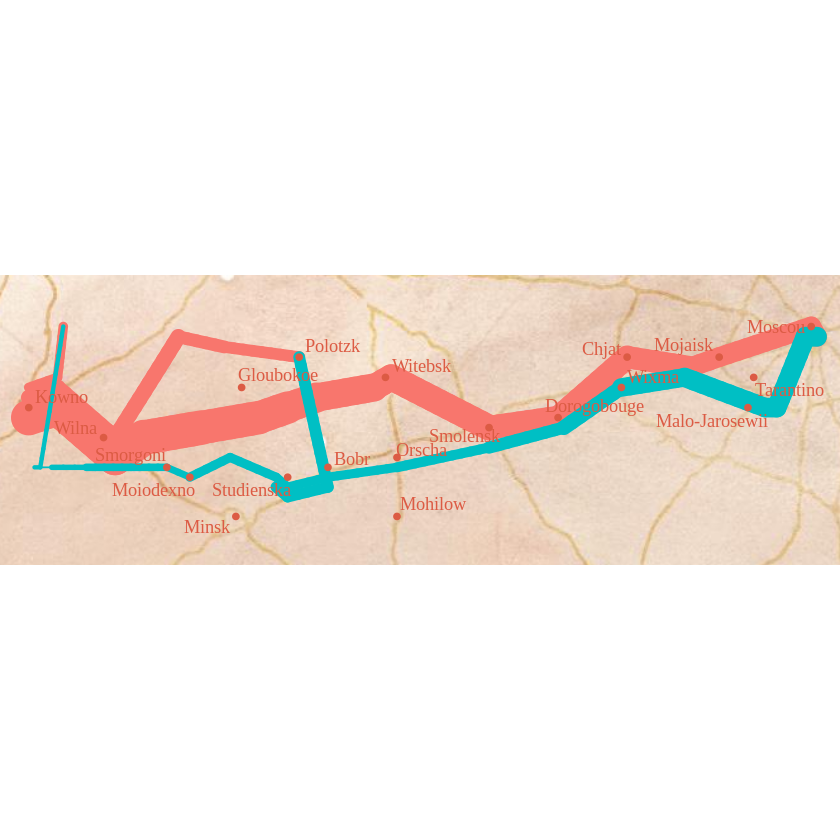

In [50]:
march.1812.plot


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


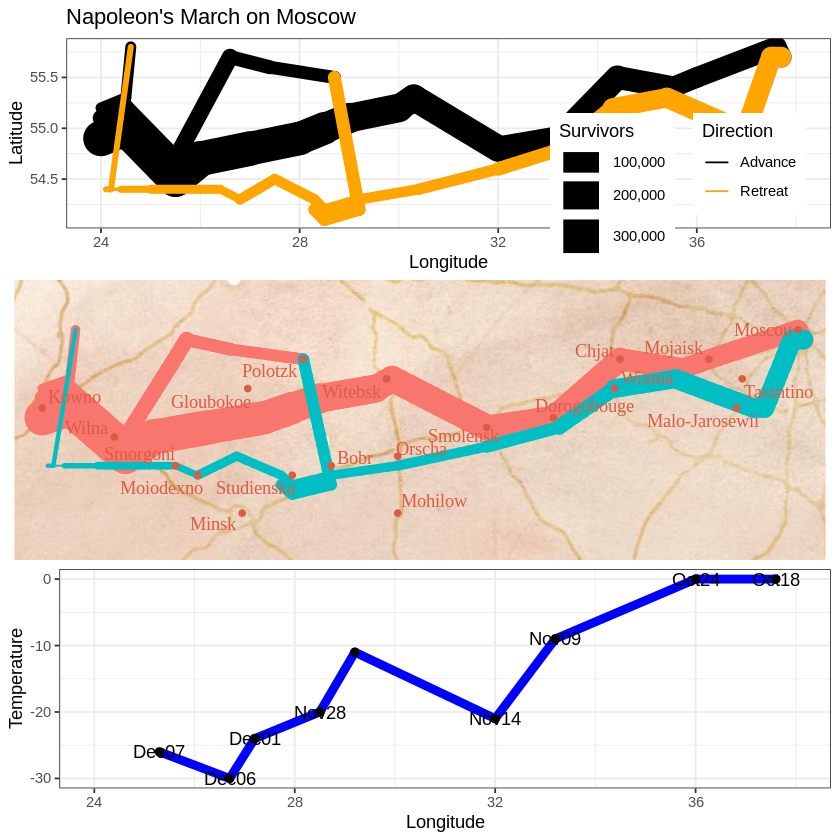

In [51]:
grid.arrange(plot_minard, march.1812.plot, plot_temp, nrow=3, ncol=1)